# Assignment 1

In [2]:
# Import standard libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.datasets import load_wine

# Load the Wine dataset
wine_data = load_wine()

# Convert to DataFrame
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Bind the 'class' (wine target) to the DataFrame
wine_df['class'] = wine_data.target

# Display the DataFrame
#wine_df


In [6]:
# Select predictors (excluding the last column)
predictors = wine_df.iloc[:, :-1]

# Standardize the predictors
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# change the response variable data type to categorical and assign it to a new variable for better readability
wine_df['class'] = wine_df['class'].astype('category')
response_var = wine_df['class'] 

# Display the head of the standardized predictors
#print(predictors_standardized.head())

In [34]:
# Import statistics Library
import statistics
# initialize the KNN classifier, n_neighbors is not relevant because it will iterate later through the grid search
knn = KNeighborsClassifier(n_neighbors=1)
# define parameter grid for `n_neighbors` ranging from 1 to 50
parameter_grid = {
    "n_neighbors": range(1, 51, 1),
}
# implement a grid search using `GridSearchCV` with 10-fold cross-validation to find the optimal number of neighbors
# even if it doesn't ask for, use of scoring='accuracy' because it is the output required later
wine_tune_grid = GridSearchCV(
    estimator=knn,
    param_grid=parameter_grid,
    cv=10,
    scoring='accuracy'
)
# Loop through several seeds and save the best parameter for k n_neighbors
seeds_max = 2880
seeds = []
for seed in range(seeds_max):
    # split the data into a training and testing set. hint: use train_test_split !
    predictors_standardized_train, predictors_standardized_test, response_var_train, response_var_test = train_test_split(
        predictors_standardized, response_var, train_size=0.75, stratify = response_var, random_state=seed
    )
    # predictor - X, response - y
    X_train = predictors_standardized_train
    y_train = response_var_train
    # fit the model on the training data
    wine_tune_grid.fit(X_train, y_train)
    # identify and return the best value for `n_neighbors` based on the grid search results
    seeds.append(wine_tune_grid.best_params_.get("n_neighbors"))
print(seeds)
k_best = statistics.mode(seeds)
print(k_best)

[28, 27, 19, 25, 31, 14, 44, 27, 16, 20, 7, 15, 3, 20, 17, 39, 25, 19, 24, 24, 7, 13, 15, 13, 13, 5, 40, 24, 33, 19, 26, 11, 41, 22, 12, 7, 9, 41, 33, 23, 26, 20, 21, 21, 5, 26, 17, 5, 5, 29, 13, 16, 26, 3, 21, 17, 18, 19, 6, 7, 29, 13, 26, 24, 44, 25, 5, 17, 20, 15, 15, 1, 5, 7, 18, 26, 17, 16, 15, 24, 11, 15, 13, 25, 13, 19, 14, 37, 13, 28, 13, 21, 7, 7, 11, 23, 26, 20, 25, 5, 19, 28, 13, 26, 7, 21, 17, 3, 14, 13, 15, 39, 5, 32, 5, 7, 27, 14, 5, 18, 28, 19, 17, 7, 3, 22, 16, 25, 10, 7, 8, 14, 26, 27, 12, 31, 27, 12, 16, 3, 8, 19, 31, 19, 24, 25, 23, 7, 7, 15, 13, 28, 19, 20, 40, 22, 27, 20, 27, 26, 15, 6, 39, 33, 23, 23, 3, 7, 5, 24, 18, 20, 24, 35, 14, 31, 24, 11, 23, 17, 19, 4, 22, 21, 21, 25, 7, 25, 9, 17, 45, 7, 22, 23, 3, 27, 24, 20, 30, 9, 26, 19, 28, 27, 27, 20, 23, 12, 16, 7, 24, 3, 26, 5, 26, 7, 22, 3, 16, 46, 17, 13, 34, 26, 20, 15, 25, 22, 17, 5, 15, 45, 16, 16, 15, 25, 21, 23, 22, 3, 25, 6, 16, 23, 28, 8, 12, 48, 25, 15, 21, 29, 45, 13, 14, 29, 7, 3, 26, 23, 26, 3, 32, 22

<Axes: >

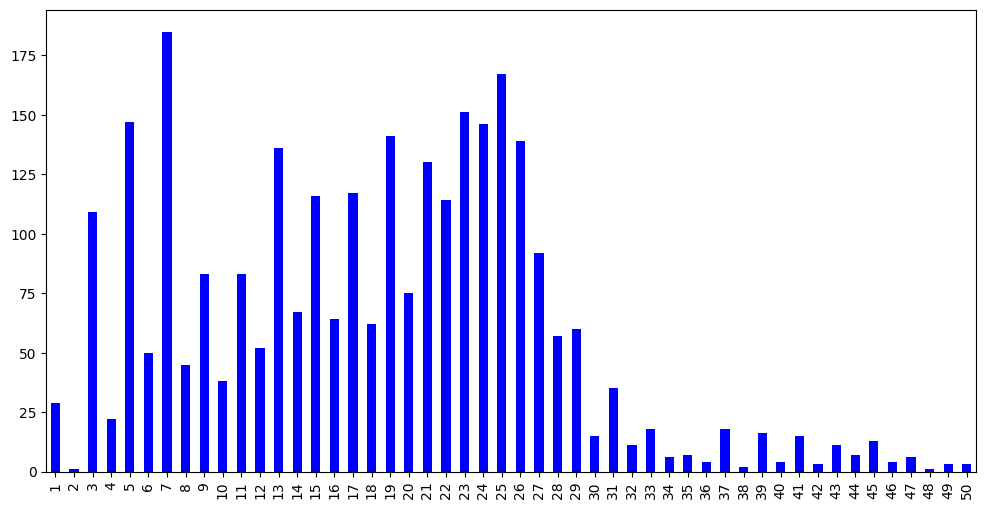

In [35]:
series = pd.Series(seeds)
series.value_counts().sort_index().plot(kind='bar', figsize=(12, 6), color='blue')

#### Model evaluation

Using the best value for `n_neighbors`, fit a KNN model on the training data and evaluate its performance on the test set using `accuracy_score`.

In [ ]:
# best value for `n_neighbors` is k_best = 19
#k_best = 7   # Going through all these possible split shuffles with k = 7, the accuracy score average is 96.6% and the standard deviation is 2.4%
#k_best = 24  # Going through all these possible split shuffles with k = 24, the accuracy score average is 96.9% and the standard deviation is 2.3%
#k_best = 25  # Going through all these possible split shuffles with k = 25, the accuracy score average is 97.1% and the standard deviation is 2.2%
knn = KNeighborsClassifier(n_neighbors = k_best)
accuracy_score_list = []
# with best k n_neighbors figured out, I calculate the accuracy score in all previous seeds and do the average
for seed in range(seeds_max):
    # split the data into a training and testing set. hint: use train_test_split !
    predictors_standardized_train, predictors_standardized_test, response_var_train, response_var_test = train_test_split(
        predictors_standardized, response_var, train_size=0.75, stratify = response_var, random_state=seed
    )
    # predictor - X, response - y
    X_train = predictors_standardized_train
    y_train = response_var_train
    # fit the model on the training data
    knn.fit(X_train, y_train)
    # bring the test data
    X_test = predictors_standardized_test
    y_true = response_var_test
    # predict the class labels for the test data
    y_pred = knn.predict(X_test)
    # obtain the accuracy score
    accuracy_score_list.append(accuracy_score(y_true, y_pred))
accuracy_score_av = statistics.mean(accuracy_score_list)
accuracy_score_sd = statistics.stdev(accuracy_score_list)
print(f'Going through all these possible split shuffles with k = {k_best}, the accuracy score average is {round(accuracy_score_av*100,1)}% and the standard deviation is {round(accuracy_score_sd*100,1)}%')

Going through all these possible split shuffles with k = 25, the accuracy score average is 97.1% and the standard deviation is 2.2%
